# Section 1: Business Understanding

This is the first Udacity Data Science Nano degree project. For this project, I picked the Boston Airbnb dataset(calendar.csv) to understand the booking seasonality in the local market:
<br>&ensp; Question: For airbnb booking in the Boston area, is there any strong seasonality? If so, what is the seasonal pattern with regard to the daily number of booking changes?(the other two questions are written separately in other two notebooks)
<br>&ensp; The method for detecting any seasonality is to plot daily average number of booking on graph and to see if there is any upper tread or down tread in any particular time period.

In [1]:
#import python packages
import datetime as dt
import pandas as pd

# Section 2: Data Understanding

&ensp; This calendar.csv dataset has four columns and 1,308,889 records in total. The column called "available" needs to filter on for next analysis. Since we are going to calculate daily number of bookings, columns "Date" and "Listing_id" will be used in this analysis.

##### Gather Data

In [4]:
# Load calendar data to variable, calendar_file
calendar_file = pd.read_csv(u'/Users/zhosheng/Desktop/Study/DS_Udacity_Projects/Boston/calendar.csv')

# Have glimpse of data set
print(calendar_file.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1308890 non-null  int64 
 1   date        1308890 non-null  object
 2   available   1308890 non-null  object
 3   price       643037 non-null   object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB
None


# Section 3: Data Preparation

&ensp;  1. we need to filter column "available" on f to refine the dataset so that we later calculate booked listing.
<br> 
&ensp;  2. we need to convert the column "date" from object type to datetime type.
<br>
&ensp;  3. we need to calculate the count of booked listing_id on a daily level.
<br>
&ensp;  4. we need to create a new data frame to obtain the "date_time" and "count" fields 

In [9]:
# Filter "availble" field on f
print('Before filter is {}'.format(calendar_file.shape[0]))
calendar_file=calendar_file[calendar_file['available']=='f']
print('After filter is {}'.format(calendar_file.shape[0]))

# Convert "date" object data type to datetime and add a new column called date_time to the existing data frame
calendar_file['date_time']=calendar_file['date'].astype('datetime64[ns]')

# count the number of booking on each daily 
cnt=calendar_file.groupby(['date_time'])['listing_id'].count()
cnt=cnt.to_frame()

#Convert series type to data frame
cnt.reset_index(inplace=True)
cnt.rename(columns={'listing_id':'count'},inplace=True)
cnt.describe()

Before filter is 1308890
After filter is 665853


,count
count,365.000000
mean,1824.254795
std,273.240049
min,1379.000000
25%,1640.000000
50%,1815.000000
75%,1848.000000
max,3016.000000


# Section 4: Evaluate the Results

&ensp;  After ploting the new date frame, cnt on line chart, we do find there are some seasonalities in the Boston market based on the average number of daily booking. It seems that the peak season is in September and it falls sharply throughout the winter season until it hits the bottom in December. Then the number of booking starts slowly picks up as the temperature gets warmer and finally stabilizes throughout the whole summer.

<AxesSubplot:xlabel='date_time'>

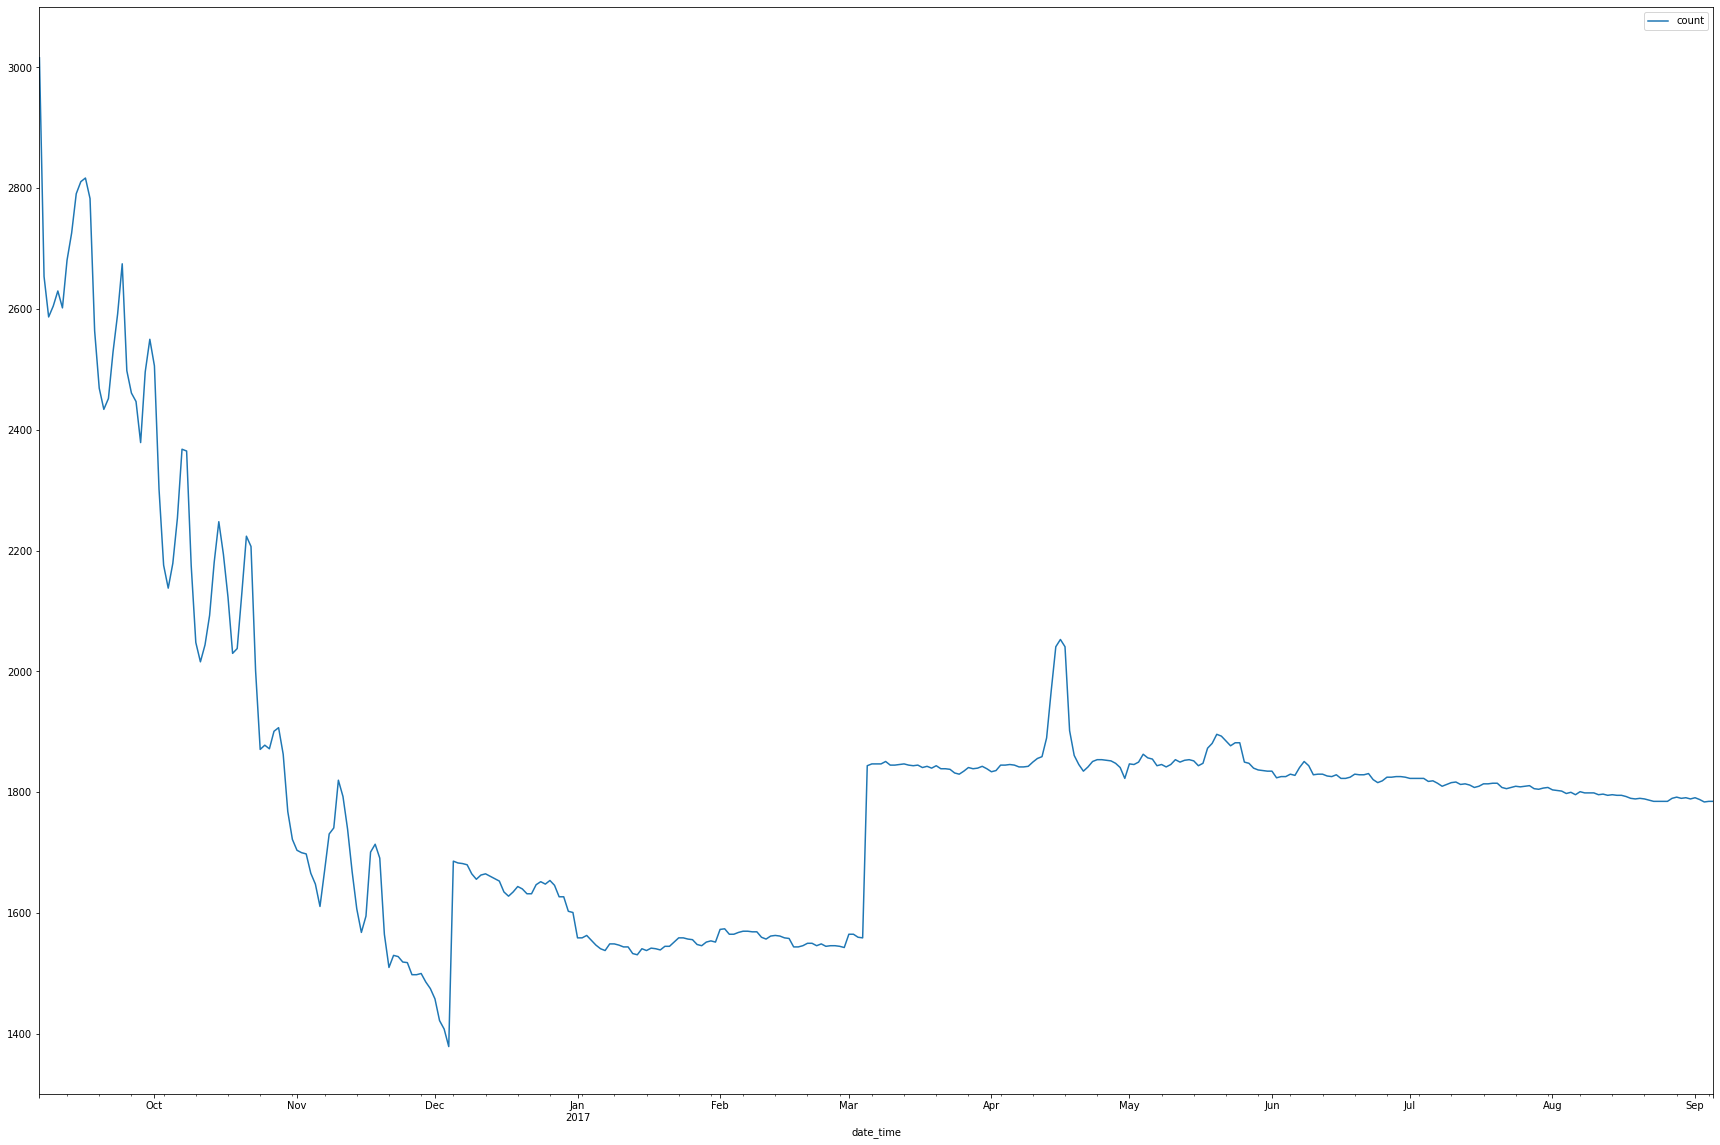

In [10]:
# Draw a line chart between 'date_time' and 'count'
cnt.plot(kind='line', x='date_time',y='count',figsize=(30,20), ylim=(1300,3100))